# Step 1: Creating Dataset frame by Converting NHANES .XPT Files to CSV

In [1]:
pip install jovian --upgrade


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6485 sha256=c0eb46d9577ef3e5bf7a73f4177caa6acf4e3d4906b0e063cc1470329f3d3bf8
  Stored in directory: c:\users\ivan\appdata\local\pip\cache\wheels\35\34\36\b9f3546da107cf37bab75cdb3ce1ebd8d744648985d0111ca1
Successfully built uuid


In [3]:
import jovian

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [1]:
pip install pandas pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyreadstat

# Importing Meta Data for Risk Indicators in Regard to CardioVascular Diseases

In [11]:
# Loading all Risk Factors XPT Files that Contribute to Cardiovascular Diseases

import pyreadstat
bmx, meta = pyreadstat.read_xport("NHANES/Cardiovascular/2013-2014/BMX_H.xpt") # Body Measure Index
bpx, meta = pyreadstat.read_xport("NHANES/Cardiovascular/2013-2014/BPX_H.xpt") # Blood Pressure
hdl, meta = pyreadstat.read_xport("NHANES/Cardiovascular/2013-2014/HDL_H.xpt") # Cholesterol
tchol, meta = pyreadstat.read_xport("NHANES/Cardiovascular/2013-2014/TCHOL_H.xpt") # Total Cholesterol
demo, meta = pyreadstat.read_xport("NHANES/Demographic/2013-2014/DEMO_H.xpt") # Demographics
trigly, meta = pyreadstat.read_xport("NHANES/Cardiovascular/2013-2014/TRIGLY_H.xpt") # Cholesterol- Trigl
smq, meta = pyreadstat.read_xport("NHANES/Lifestyle factors/2013-2014/SMQ_H.xpt") # Smoking - Cigeratte Use
paq, meta = pyreadstat.read_xport("NHANES/Lifestyle factors/2013-2014/PAQ_H.xpt") # Physical Activity
print(bmx.head())
print(demo.head())
# print(hdl.head())
# print(tchol.head())
# print(trigly.head())


      SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  73557.0       1.0   78.3    NaN       NaN       NaN      NaN      NaN   
1  73558.0       1.0   89.5    NaN       NaN       NaN      NaN      NaN   
2  73559.0       1.0   88.9    NaN       NaN       NaN      NaN      NaN   
3  73560.0       1.0   32.2    NaN       NaN       NaN      NaN      NaN   
4  73561.0       3.0   52.0    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  BMXSAD1  BMXSAD2  \
0  171.3    NaN  ...     35.3      NaN     100.0       NaN     20.5     20.6   
1  176.8    NaN  ...     34.7      NaN     107.6       NaN     24.2     24.5   
2  175.3    NaN  ...     33.5      NaN     109.2       NaN     25.8     25.4   
3  137.3    NaN  ...     21.0      NaN      61.0       NaN     14.8     15.0   
4  162.4    NaN  ...     25.2      NaN       NaN       1.0      NaN      NaN   

   BMXSAD3  BMXSAD4  BMDAVSAD  BMDSADCM  
0      NaN      NaN 

# Renaming Columns and Dropping Irrelevant Ones for Body Measure

# Analysing Body Measure for only Adults 

In [17]:
import pandas as pd

demo.to_csv("demo_2013_2014.csv", index=False)

demo = pd.read_csv('demo_2013_2014.csv')




# Renaming Gender
demo.rename(columns={
   'RIAGENDR': "gender",
    "RIDAGEYR": "age"
}, inplace=True)

columns_to_keep = [
    "SEQN", "gender", "age",
]
demo = demo[columns_to_keep]

# Convert to string and recode
demo['gender'] = demo['gender'].map({1: 'Male', 2: 'Female'}).astype('object')

# Confirm the result
print(demo[['SEQN', 'gender', 'age']].head())

      SEQN  gender   age
0  73557.0    Male  69.0
1  73558.0    Male  54.0
2  73559.0    Male  72.0
3  73560.0    Male   9.0
4  73561.0  Female  73.0


In [19]:
# Merging BMX and Demographic based on participant number

bmx = bmx.merge(demo, on='SEQN')
bmx = bmx[bmx['age'] >= 18]


In [21]:
# Rename columns
bmx.rename(columns={
    "SEQN": "participant_id",
    "BMXWT": "weight_kg",
    "BMXHT": "height_cm",
    "BMXBMI": "bmi",
    "BMXWAIST": "waist_circumference_cm",
    "BMDSTATS": "exam_status"
}, inplace=True)


In [23]:
bmx_columns_to_keep = [
    "participant_id", "exam_status", "age", "gender",
    "weight_kg", "height_cm", "bmi", "waist_circumference_cm"
]

bmx = bmx[bmx_columns_to_keep]


In [25]:
# Filtering for exams completed

bmx = bmx[bmx['exam_status'] == 1]

In [27]:
print(bmx.head())

   participant_id  exam_status   age  gender  weight_kg  height_cm   bmi  \
0         73557.0          1.0  69.0    Male       78.3      171.3  26.7   
1         73558.0          1.0  54.0    Male       89.5      176.8  28.6   
2         73559.0          1.0  72.0    Male       88.9      175.3  28.9   
5         73562.0          1.0  56.0    Male      105.0      158.7  41.7   
7         73564.0          1.0  61.0  Female       93.4      161.8  35.7   

   waist_circumference_cm  
0                   100.0  
1                   107.6  
2                   109.2  
5                   123.1  
7                   110.8  


# Saving Body Measure to CSV 

In [30]:


# Save to CSV
bmx.to_csv("BMX_H_cleaned.csv", index=False)

In [32]:
# Inspecting the Dataset

In [34]:
# Load CSV
bmx = pd.read_csv("BMX_H_cleaned.csv")

# Print the first 5 rows
print(bmx.head())

# Print an overview: shape and descriptive stats
print("\nDataset shape:", bmx.shape)
print("\nSummary statistics:")
print(bmx.describe())

   participant_id  exam_status   age  gender  weight_kg  height_cm   bmi  \
0         73557.0          1.0  69.0    Male       78.3      171.3  26.7   
1         73558.0          1.0  54.0    Male       89.5      176.8  28.6   
2         73559.0          1.0  72.0    Male       88.9      175.3  28.9   
3         73562.0          1.0  56.0    Male      105.0      158.7  41.7   
4         73564.0          1.0  61.0  Female       93.4      161.8  35.7   

   waist_circumference_cm  
0                   100.0  
1                   107.6  
2                   109.2  
3                   123.1  
4                   110.8  

Dataset shape: (5361, 8)

Summary statistics:
       participant_id  exam_status          age    weight_kg    height_cm  \
count     5361.000000       5361.0  5361.000000  5361.000000  5361.000000   
mean     78664.355158          1.0    46.833054    80.555755   167.411242   
std       2923.178375          0.0    18.013757    21.144034    10.121475   
min      73557.00000

In [36]:
# Through the info function let's know the columns with null values

bmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          5361 non-null   float64
 1   exam_status             5361 non-null   float64
 2   age                     5361 non-null   float64
 3   gender                  5361 non-null   object 
 4   weight_kg               5361 non-null   float64
 5   height_cm               5361 non-null   float64
 6   bmi                     5361 non-null   float64
 7   waist_circumference_cm  5361 non-null   float64
dtypes: float64(7), object(1)
memory usage: 335.2+ KB


In [38]:
# Convert participant_id and exam_status to integer type
bmx['participant_id'] = bmx['participant_id'].astype(int)
bmx['exam_status'] = bmx['exam_status'].astype(int)
bmx['age'] = bmx['age'].astype(int)

# Confirm changes
print(bmx.dtypes[['participant_id', 'exam_status', 'age']])
bmx.info()

participant_id    int32
exam_status       int32
age               int32
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          5361 non-null   int32  
 1   exam_status             5361 non-null   int32  
 2   age                     5361 non-null   int32  
 3   gender                  5361 non-null   object 
 4   weight_kg               5361 non-null   float64
 5   height_cm               5361 non-null   float64
 6   bmi                     5361 non-null   float64
 7   waist_circumference_cm  5361 non-null   float64
dtypes: float64(4), int32(3), object(1)
memory usage: 272.4+ KB


In [40]:
bmx.head()

,participant_id,exam_status,age,gender,weight_kg,height_cm,bmi,waist_circumference_cm
0,73557,1,69,Male,78.3,171.3,26.7,100.0
1,73558,1,54,Male,89.5,176.8,28.6,107.6
2,73559,1,72,Male,88.9,175.3,28.9,109.2
3,73562,1,56,Male,105.0,158.7,41.7,123.1
4,73564,1,61,Female,93.4,161.8,35.7,110.8


# Body Measure Cleaning and PreProcessing

In [43]:
# Check for missing values per column
print(bmx.isnull().sum())

# Check the percentage of missing values
print("\nPercentage of missing values:")
print((bmx.isnull().sum() / len(bmx) * 100).round(2))

participant_id            0
exam_status               0
age                       0
gender                    0
weight_kg                 0
height_cm                 0
bmi                       0
waist_circumference_cm    0
dtype: int64

Percentage of missing values:
participant_id            0.0
exam_status               0.0
age                       0.0
gender                    0.0
weight_kg                 0.0
height_cm                 0.0
bmi                       0.0
waist_circumference_cm    0.0
dtype: float64


# Detecting outliers and checking if data is symmetrical or skewed in order to handle the null values in 

In [46]:

numeric_cols = ['height_cm', 'bmi', 'waist_circumference_cm', 'weight_kg']

# Detect outliers using the IQR method
for col in numeric_cols:
    Q1 = bmx[col].quantile(0.25)
    Q3 = bmx[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = bmx[(bmx[col] < lower_bound) | (bmx[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print(outliers[[col]])


Column: height_cm
Lower Bound: 138.50, Upper Bound: 196.10
Number of Outliers: 8
      height_cm
591       135.4
1704      197.0
2028      198.2
2239      199.4
2517      196.7
3098      202.6
4095      136.3
4852      196.5

Column: bmi
Lower Bound: 11.35, Upper Bound: 44.55
Number of Outliers: 147
       bmi
55    46.1
80    46.2
133   54.2
137   49.9
162   58.6
...    ...
5139  53.6
5174  50.0
5221  45.1
5312  48.0
5320  48.1

[147 rows x 1 columns]

Column: waist_circumference_cm
Lower Bound: 53.80, Upper Bound: 140.20
Number of Outliers: 80
      waist_circumference_cm
80                     141.1
137                    143.5
162                    150.5
180                    142.2
236                    140.5
...                      ...
5131                   141.6
5139                   151.4
5174                   140.8
5312                   146.5
5320                   153.0

[80 rows x 1 columns]

Column: weight_kg
Lower Bound: 25.85, Upper Bound: 131.85
Number of Outlier

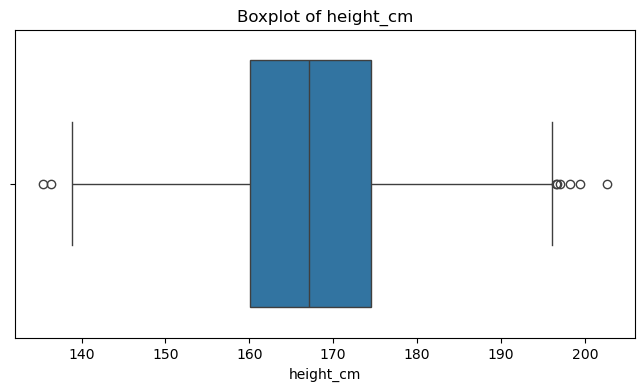

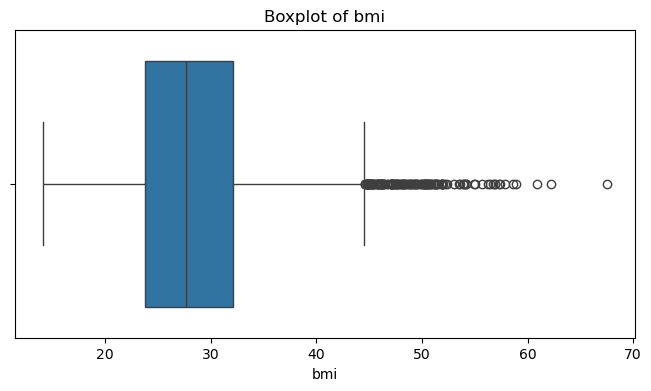

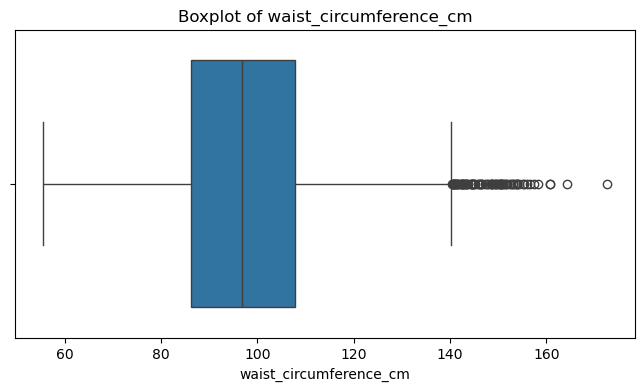

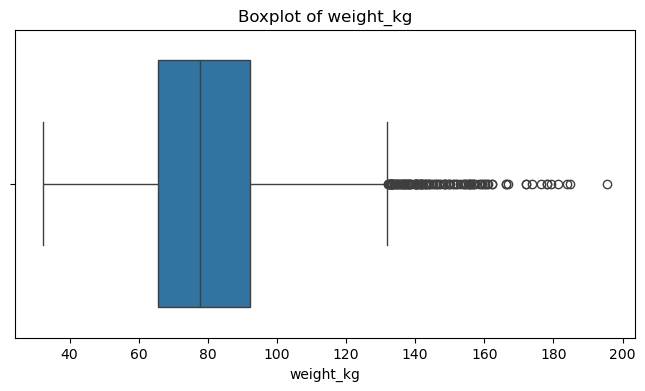

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=bmx[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [50]:
# Rather than dropping outliers for the dataset we will flag them 

# Add outlier flags
bmx['height_outlier'] = ((bmx['height_cm'] < 138.50) | (bmx['height_cm'] > 196.10)).astype(int)
bmx['bmi_outlier'] = ((bmx['bmi'] < 11.35) | (bmx['bmi'] > 44.55)).astype(int)
bmx['waist_outlier'] = ((bmx['waist_circumference_cm'] < 53.80) | (bmx['waist_circumference_cm'] > 140.20)).astype(int)
bmx['weight_outlier'] = ((bmx['weight_kg'] < 25.85) | (bmx['weight_kg'] > 131.85)).astype(int)

# Check counts
print(bmx[['height_outlier', 'bmi_outlier', 'waist_outlier', 'weight_outlier']].sum())



height_outlier      8
bmi_outlier       147
waist_outlier      80
weight_outlier    116
dtype: int64


In [52]:
bmx.to_csv("bmx_cleaned_2013_2014.csv", index=False)

# Cleaning and Preprocessing of Blood Pressure

In [55]:
bpx.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
0,73557.0,1.0,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,114.0,76.0,2.0,102.0,74.0,2.0,NaN,NaN,NaN
1,73558.0,1.0,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,2.0,160.0,80.0,2.0,156.0,42.0,2.0,NaN,NaN,NaN
2,73559.0,1.0,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,140.0,76.0,2.0,146.0,80.0,2.0,NaN,NaN,NaN
3,73560.0,1.0,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,2.0,102.0,34.0,2.0,104.0,38.0,2.0,NaN,NaN,NaN
4,73561.0,1.0,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,2.0,134.0,88.0,1.0,142.0,86.0,2.0,NaN,NaN,NaN


# Keeping important Indicators for Blood Pressure and Renaming Columns

In [58]:

# Rename columns
bpx.rename(columns={
    'SEQN': 'participant_id',
    'BPXSY1': 'systolic_bp_1',
    'BPXDI1': 'diastolic_bp_1',
    'BPXSY2': 'systolic_bp_2',
    'BPXDI2': 'diastolic_bp_2',
    'BPXSY3': 'systolic_bp_3',
    'BPXDI3': 'diastolic_bp_3',
    'BPXSY4': 'systolic_bp_4',
    'BPXDI4': 'diastolic_bp_4',
}, inplace=True)



In [60]:

# Defining the columns to keep
cols_to_keep = [
    'participant_id',       # Participant ID
    'systolic_bp_1', 'diastolic_bp_1',  # Systolic & Diastolic BP, first reading
    'systolic_bp_2', 'diastolic_bp_2',  # Systolic & Diastolic BP, second reading
    'systolic_bp_3', 'diastolic_bp_3',  # Systolic & Diastolic BP, third reading
    'systolic_bp_4', 'diastolic_bp_4'  # Systolic & Diastolic BP, fourth reading
]

# Filter the DataFrame
bpx = bpx[cols_to_keep]


In [62]:
# Convert participant_id to int before merging
bpx['participant_id'] = bpx['participant_id'].astype(int)


# Confirm changes
print(bpx.dtypes[['participant_id']])
bpx.info()


participant_id    int32
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  9813 non-null   int32  
 1   systolic_bp_1   7172 non-null   float64
 2   diastolic_bp_1  7172 non-null   float64
 3   systolic_bp_2   7409 non-null   float64
 4   diastolic_bp_2  7409 non-null   float64
 5   systolic_bp_3   7408 non-null   float64
 6   diastolic_bp_3  7408 non-null   float64
 7   systolic_bp_4   515 non-null    float64
 8   diastolic_bp_4  515 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 651.8 KB


In [64]:
# Save the filtered version
bpx.to_csv("blood_pressure_2013_2014.csv", index=False)

# Print the first few rows
bpx.head()

,participant_id,systolic_bp_1,diastolic_bp_1,systolic_bp_2,diastolic_bp_2,systolic_bp_3,diastolic_bp_3,systolic_bp_4,diastolic_bp_4
0,73557,122.0,72.0,114.0,76.0,102.0,74.0,NaN,NaN
1,73558,156.0,62.0,160.0,80.0,156.0,42.0,NaN,NaN
2,73559,140.0,90.0,140.0,76.0,146.0,80.0,NaN,NaN
3,73560,108.0,38.0,102.0,34.0,104.0,38.0,NaN,NaN
4,73561,136.0,86.0,134.0,88.0,142.0,86.0,NaN,NaN


# Merging Body Mass Index and Blood Pressure on Participant ID

In [67]:

# Convert participant_id and exam_status to integer type
bpx['participant_id'] = bpx['participant_id'].astype(int)

# Confirm changes
print(bpx.dtypes[['participant_id']])
bpx.info()


participant_id    int32
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  9813 non-null   int32  
 1   systolic_bp_1   7172 non-null   float64
 2   diastolic_bp_1  7172 non-null   float64
 3   systolic_bp_2   7409 non-null   float64
 4   diastolic_bp_2  7409 non-null   float64
 5   systolic_bp_3   7408 non-null   float64
 6   diastolic_bp_3  7408 non-null   float64
 7   systolic_bp_4   515 non-null    float64
 8   diastolic_bp_4  515 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 651.8 KB


In [69]:
bp = pd.read_csv("blood_pressure_2013_2014.csv")
bmi = pd.read_csv("bmx_cleaned_2013_2014.csv")

cvd = pd.merge(bmi, bp, on='participant_id', how='inner')


In [71]:
cvd.head()

,participant_id,exam_status,age,gender,weight_kg,height_cm,bmi,waist_circumference_cm,height_outlier,bmi_outlier,waist_outlier,weight_outlier,systolic_bp_1,diastolic_bp_1,systolic_bp_2,diastolic_bp_2,systolic_bp_3,diastolic_bp_3,systolic_bp_4,diastolic_bp_4
0,73557,1,69,Male,78.3,171.3,26.7,100.0,0,0,0,0,122.0,72.0,114.0,76.0,102.0,74.0,NaN,NaN
1,73558,1,54,Male,89.5,176.8,28.6,107.6,0,0,0,0,156.0,62.0,160.0,80.0,156.0,42.0,NaN,NaN
2,73559,1,72,Male,88.9,175.3,28.9,109.2,0,0,0,0,140.0,90.0,140.0,76.0,146.0,80.0,NaN,NaN
3,73562,1,56,Male,105.0,158.7,41.7,123.1,0,0,0,0,160.0,84.0,158.0,82.0,154.0,80.0,NaN,NaN
4,73564,1,61,Female,93.4,161.8,35.7,110.8,0,0,0,0,118.0,80.0,124.0,80.0,126.0,82.0,NaN,NaN


In [73]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          5361 non-null   int64  
 1   exam_status             5361 non-null   int64  
 2   age                     5361 non-null   int64  
 3   gender                  5361 non-null   object 
 4   weight_kg               5361 non-null   float64
 5   height_cm               5361 non-null   float64
 6   bmi                     5361 non-null   float64
 7   waist_circumference_cm  5361 non-null   float64
 8   height_outlier          5361 non-null   int64  
 9   bmi_outlier             5361 non-null   int64  
 10  waist_outlier           5361 non-null   int64  
 11  weight_outlier          5361 non-null   int64  
 12  systolic_bp_1           4970 non-null   float64
 13  diastolic_bp_1          4970 non-null   float64
 14  systolic_bp_2           5133 non-null   

In [75]:
# Checking for nulls

# Check for missing values
print(cvd.isnull().sum())
# Check the percentage of missing values
print("\nPercentage of missing values:")
print((cvd.isnull().sum() / len(cvd) * 100).round(2))

participant_id               0
exam_status                  0
age                          0
gender                       0
weight_kg                    0
height_cm                    0
bmi                          0
waist_circumference_cm       0
height_outlier               0
bmi_outlier                  0
waist_outlier                0
weight_outlier               0
systolic_bp_1              391
diastolic_bp_1             391
systolic_bp_2              228
diastolic_bp_2             228
systolic_bp_3              221
diastolic_bp_3             221
systolic_bp_4             4991
diastolic_bp_4            4991
dtype: int64

Percentage of missing values:
participant_id             0.00
exam_status                0.00
age                        0.00
gender                     0.00
weight_kg                  0.00
height_cm                  0.00
bmi                        0.00
waist_circumference_cm     0.00
height_outlier             0.00
bmi_outlier                0.00
waist_outlier   

In [77]:
numeric_cols = ['systolic_bp_1', 'systolic_bp_2', 'systolic_bp_3', 'diastolic_bp_1', 'diastolic_bp_2', 'diastolic_bp_3']

# Detect outliers using the IQR method
for col in numeric_cols:
    Q1 = cvd[col].quantile(0.25)
    Q3 = cvd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = cvd[(cvd[col] < lower_bound) | (cvd[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print(outliers[[col]])


Column: systolic_bp_1
Lower Bound: 77.00, Upper Bound: 165.00
Number of Outliers: 140
      systolic_bp_1
49            176.0
73            168.0
85            168.0
90            166.0
279           170.0
...             ...
5209          172.0
5210          170.0
5217          176.0
5293          188.0
5307          170.0

[140 rows x 1 columns]

Column: systolic_bp_2
Lower Bound: 77.00, Upper Bound: 165.00
Number of Outliers: 139
      systolic_bp_2
49            178.0
73            166.0
90            166.0
148            76.0
280           178.0
...             ...
5210          166.0
5217          168.0
5293          182.0
5307          168.0
5357          168.0

[139 rows x 1 columns]

Column: systolic_bp_3
Lower Bound: 77.00, Upper Bound: 165.00
Number of Outliers: 138
      systolic_bp_3
49            174.0
73            168.0
90            166.0
280           170.0
290           166.0
...             ...
5210          166.0
5242          174.0
5293          182.0
5307       

# Preprocessing and Handling Outliers and Nulls for the Blood Pressure Columns

In [80]:
# Dropping Systolic_BP_4 and Diastolic_BP_4 percentage of null values is too high; imputation might cause bias

# Drop BP4 columns due to excessive missingness
cvd = cvd.drop(['systolic_bp_4', 'diastolic_bp_4'], axis=1)

In [82]:
# Flagged Diastolic BP values that are Zeroes or near-zeroes (0, 26). These are likely data entry errors — physiologically impossible.


In [84]:
import numpy as np

# Flag diastolic BP values of 0 as missing
diastolic_cols = ['diastolic_bp_1', 'diastolic_bp_2', 'diastolic_bp_3']
for col in diastolic_cols:
    cvd.loc[cvd[col] == 0, col] = np.nan

# Optionally: Impute missing diastolic values with the median
for col in diastolic_cols:
    cvd[col] = cvd[col].fillna(cvd[col].median())


In [86]:
# Impute missing values in BP1–3 using median
bp_cols_to_impute = [
    'systolic_bp_1', 'diastolic_bp_1',
    'systolic_bp_2', 'diastolic_bp_2',
    'systolic_bp_3', 'diastolic_bp_3'
]

for col in bp_cols_to_impute:
    median_value = cvd[col].median()
    cvd[col] = cvd[col].fillna(median_value)

In [88]:
# Checking for nulls

# Check for missing values
print(cvd.isnull().sum())
# Check the percentage of missing values
print("\nPercentage of missing values:")
print((cvd.isnull().sum() / len(cvd) * 100).round(2))

participant_id            0
exam_status               0
age                       0
gender                    0
weight_kg                 0
height_cm                 0
bmi                       0
waist_circumference_cm    0
height_outlier            0
bmi_outlier               0
waist_outlier             0
weight_outlier            0
systolic_bp_1             0
diastolic_bp_1            0
systolic_bp_2             0
diastolic_bp_2            0
systolic_bp_3             0
diastolic_bp_3            0
dtype: int64

Percentage of missing values:
participant_id            0.0
exam_status               0.0
age                       0.0
gender                    0.0
weight_kg                 0.0
height_cm                 0.0
bmi                       0.0
waist_circumference_cm    0.0
height_outlier            0.0
bmi_outlier               0.0
waist_outlier             0.0
weight_outlier            0.0
systolic_bp_1             0.0
diastolic_bp_1            0.0
systolic_bp_2             0.0
di

In [90]:
cvd.head()

,participant_id,exam_status,age,gender,weight_kg,height_cm,bmi,waist_circumference_cm,height_outlier,bmi_outlier,waist_outlier,weight_outlier,systolic_bp_1,diastolic_bp_1,systolic_bp_2,diastolic_bp_2,systolic_bp_3,diastolic_bp_3
0,73557,1,69,Male,78.3,171.3,26.7,100.0,0,0,0,0,122.0,72.0,114.0,76.0,102.0,74.0
1,73558,1,54,Male,89.5,176.8,28.6,107.6,0,0,0,0,156.0,62.0,160.0,80.0,156.0,42.0
2,73559,1,72,Male,88.9,175.3,28.9,109.2,0,0,0,0,140.0,90.0,140.0,76.0,146.0,80.0
3,73562,1,56,Male,105.0,158.7,41.7,123.1,0,0,0,0,160.0,84.0,158.0,82.0,154.0,80.0
4,73564,1,61,Female,93.4,161.8,35.7,110.8,0,0,0,0,118.0,80.0,124.0,80.0,126.0,82.0


In [92]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          5361 non-null   int64  
 1   exam_status             5361 non-null   int64  
 2   age                     5361 non-null   int64  
 3   gender                  5361 non-null   object 
 4   weight_kg               5361 non-null   float64
 5   height_cm               5361 non-null   float64
 6   bmi                     5361 non-null   float64
 7   waist_circumference_cm  5361 non-null   float64
 8   height_outlier          5361 non-null   int64  
 9   bmi_outlier             5361 non-null   int64  
 10  waist_outlier           5361 non-null   int64  
 11  weight_outlier          5361 non-null   int64  
 12  systolic_bp_1           5361 non-null   float64
 13  diastolic_bp_1          5361 non-null   float64
 14  systolic_bp_2           5361 non-null   

# Data Preprocessing, Merging and Cleaning For Cholesterol Variable(HDL)

In [95]:
hdl.head()

,SEQN,LBDHDD,LBDHDDSI
0,73557.0,65.0,1.68
1,73558.0,50.0,1.29
2,73559.0,60.0,1.55
3,73560.0,61.0,1.58
4,73561.0,85.0,2.20


In [97]:
hdl.rename(columns={
    'SEQN': 'participant_id',
    'LBDHDD': 'hdl_cholesterol_mg_dl',
    'LBDHDDSI': 'hdl_cholesterol_mmol_l'
}, inplace=True)


In [99]:
hdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          8291 non-null   float64
 1   hdl_cholesterol_mg_dl   7624 non-null   float64
 2   hdl_cholesterol_mmol_l  7624 non-null   float64
dtypes: float64(3)
memory usage: 194.4 KB


# Merging Cholesterol Dataset to CVD

In [102]:
# Merging via participant ID converting to int to merge

hdl['participant_id'] = hdl['participant_id'].astype(int)

# Confirm changes
print(hdl.dtypes[['participant_id']])
hdl.info()

participant_id    int32
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          8291 non-null   int32  
 1   hdl_cholesterol_mg_dl   7624 non-null   float64
 2   hdl_cholesterol_mmol_l  7624 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 162.1 KB


In [104]:
# Save the filtered version
hdl.to_csv("cholesterol_2013_2014.csv", index=False)

In [106]:
cvd.to_csv("cardiovascular_2013_2014.csv", index=False)

In [108]:
# Merging
hdl = pd.read_csv("cholesterol_2013_2014.csv")
cvd = pd.read_csv("cardiovascular_2013_2014.csv")

cvd = pd.merge(cvd, hdl, on='participant_id', how='inner')

cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   participant_id          5361 non-null   int64  
 1   exam_status             5361 non-null   int64  
 2   age                     5361 non-null   int64  
 3   gender                  5361 non-null   object 
 4   weight_kg               5361 non-null   float64
 5   height_cm               5361 non-null   float64
 6   bmi                     5361 non-null   float64
 7   waist_circumference_cm  5361 non-null   float64
 8   height_outlier          5361 non-null   int64  
 9   bmi_outlier             5361 non-null   int64  
 10  waist_outlier           5361 non-null   int64  
 11  weight_outlier          5361 non-null   int64  
 12  systolic_bp_1           5361 non-null   float64
 13  diastolic_bp_1          5361 non-null   float64
 14  systolic_bp_2           5361 non-null   

# Cleaning and Preprocessing Cholesterol Columns

In [111]:
# Checking the percentage of nulls in hdl_cholesterol_mg_dl and hdl_cholesterol_mmol_l

# Check for missing values
print(cvd.isnull().sum())
# Check the percentage of missing values
print("\nPercentage of missing values:")
print((cvd.isnull().sum() / len(cvd) * 100).round(2))

participant_id              0
exam_status                 0
age                         0
gender                      0
weight_kg                   0
height_cm                   0
bmi                         0
waist_circumference_cm      0
height_outlier              0
bmi_outlier                 0
waist_outlier               0
weight_outlier              0
systolic_bp_1               0
diastolic_bp_1              0
systolic_bp_2               0
diastolic_bp_2              0
systolic_bp_3               0
diastolic_bp_3              0
hdl_cholesterol_mg_dl     216
hdl_cholesterol_mmol_l    216
dtype: int64

Percentage of missing values:
participant_id            0.00
exam_status               0.00
age                       0.00
gender                    0.00
weight_kg                 0.00
height_cm                 0.00
bmi                       0.00
waist_circumference_cm    0.00
height_outlier            0.00
bmi_outlier               0.00
waist_outlier             0.00
weight_outlier 

# Checking for Potential Outliers in Cholesterol Columns

In [114]:
numeric_cols = ['hdl_cholesterol_mg_dl', 'hdl_cholesterol_mmol_l']

# Detect outliers using the IQR method
for col in numeric_cols:
    Q1 = cvd[col].quantile(0.25)
    Q3 = cvd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = cvd[(cvd[col] < lower_bound) | (cvd[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print(outliers[[col]])


Column: hdl_cholesterol_mg_dl
Lower Bound: 13.50, Upper Bound: 89.50
Number of Outliers: 128
      hdl_cholesterol_mg_dl
7                      96.0
36                     97.0
63                    109.0
107                    95.0
134                    92.0
...                     ...
5127                   97.0
5226                   90.0
5311                  100.0
5318                  135.0
5333                  117.0

[128 rows x 1 columns]

Column: hdl_cholesterol_mmol_l
Lower Bound: 0.36, Upper Bound: 2.31
Number of Outliers: 128
      hdl_cholesterol_mmol_l
7                       2.48
36                      2.51
63                      2.82
107                     2.46
134                     2.38
...                      ...
5127                    2.51
5226                    2.33
5311                    2.59
5318                    3.49
5333                    3.03

[128 rows x 1 columns]


# Handling Outliers in Cholesterol

In [117]:
# Winsorize HDL cholesterol columns
cvd['hdl_cholesterol_mg_dl'] = cvd['hdl_cholesterol_mg_dl'].clip(lower=13.5, upper=89.5)
cvd['hdl_cholesterol_mmol_l'] = cvd['hdl_cholesterol_mmol_l'].clip(lower=0.36, upper=2.31)


# Handling Null Values for the Cholesterol Columns by Imputing with median

In [120]:
# Then, handle missing values with the median
cvd['hdl_cholesterol_mg_dl'] = cvd['hdl_cholesterol_mg_dl'].fillna(cvd['hdl_cholesterol_mg_dl'].median())
cvd['hdl_cholesterol_mmol_l'] = cvd['hdl_cholesterol_mmol_l'].fillna(cvd['hdl_cholesterol_mmol_l'].median())

In [122]:
# Checking the percentage of nulls in hdl_cholesterol_mg_dl and hdl_cholesterol_mmol_l

# Check for missing values
print(cvd.isnull().sum())
# Check the percentage of missing values
print("\nPercentage of missing values:")
print((cvd.isnull().sum() / len(cvd) * 100).round(2))

participant_id            0
exam_status               0
age                       0
gender                    0
weight_kg                 0
height_cm                 0
bmi                       0
waist_circumference_cm    0
height_outlier            0
bmi_outlier               0
waist_outlier             0
weight_outlier            0
systolic_bp_1             0
diastolic_bp_1            0
systolic_bp_2             0
diastolic_bp_2            0
systolic_bp_3             0
diastolic_bp_3            0
hdl_cholesterol_mg_dl     0
hdl_cholesterol_mmol_l    0
dtype: int64

Percentage of missing values:
participant_id            0.0
exam_status               0.0
age                       0.0
gender                    0.0
weight_kg                 0.0
height_cm                 0.0
bmi                       0.0
waist_circumference_cm    0.0
height_outlier            0.0
bmi_outlier               0.0
waist_outlier             0.0
weight_outlier            0.0
systolic_bp_1             0.0
diasto

In [124]:
cvd.head()

,participant_id,exam_status,age,gender,weight_kg,height_cm,bmi,waist_circumference_cm,height_outlier,bmi_outlier,waist_outlier,weight_outlier,systolic_bp_1,diastolic_bp_1,systolic_bp_2,diastolic_bp_2,systolic_bp_3,diastolic_bp_3,hdl_cholesterol_mg_dl,hdl_cholesterol_mmol_l
0,73557,1,69,Male,78.3,171.3,26.7,100.0,0,0,0,0,122.0,72.0,114.0,76.0,102.0,74.0,65.0,1.68
1,73558,1,54,Male,89.5,176.8,28.6,107.6,0,0,0,0,156.0,62.0,160.0,80.0,156.0,42.0,50.0,1.29
2,73559,1,72,Male,88.9,175.3,28.9,109.2,0,0,0,0,140.0,90.0,140.0,76.0,146.0,80.0,60.0,1.55
3,73562,1,56,Male,105.0,158.7,41.7,123.1,0,0,0,0,160.0,84.0,158.0,82.0,154.0,80.0,38.0,0.98
4,73564,1,61,Female,93.4,161.8,35.7,110.8,0,0,0,0,118.0,80.0,124.0,80.0,126.0,82.0,58.0,1.50


In [126]:
# Saving Dataset

cvd.to_csv("cardiovascular_2013_2014.csv", index=False)

# Data Preprocessing, Merging and Cleaning For Cholesterol Total Variable(tchol)

In [129]:
tchol.head()

,SEQN,LBXTC,LBDTCSI
0,73557.0,167.0,4.32
1,73558.0,170.0,4.40
2,73559.0,126.0,3.26
3,73560.0,168.0,4.34
4,73561.0,201.0,5.20


In [131]:
trigly.head()

,SEQN,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI
0,73559.0,142196.890197,51.0,0.576,56.0,1.448
1,73561.0,142266.006548,75.0,0.847,101.0,2.612
2,73564.0,134054.109760,64.0,0.723,97.0,2.508
3,73568.0,216002.505861,24.0,0.271,67.0,1.733
4,73574.0,0.000000,14.0,0.158,75.0,1.940


In [133]:
tchol = tchol.rename(columns={
    'LBXTC': 'total_cholesterol_mg_dl',
    'LBDTCSI': 'total_cholesterol_mmol_l',
    'SEQN': 'participant_id'
})


In [135]:
# Merging via participant ID, converting to int to merge

tchol['participant_id'] = tchol['participant_id'].astype(int)

# Confirm changes
print(tchol.dtypes[['participant_id']])
tchol.info()

participant_id    int32
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   participant_id            8291 non-null   int32  
 1   total_cholesterol_mg_dl   7624 non-null   float64
 2   total_cholesterol_mmol_l  7624 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 162.1 KB


In [137]:
tchol.to_csv("cholesterol_total_2013_2014.csv", index=False)

In [139]:
# Merging
tchol = pd.read_csv("cholesterol_total_2013_2014.csv")

cvd = pd.merge(cvd, tchol, on='participant_id', how='inner')

cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   participant_id            5361 non-null   int64  
 1   exam_status               5361 non-null   int64  
 2   age                       5361 non-null   int64  
 3   gender                    5361 non-null   object 
 4   weight_kg                 5361 non-null   float64
 5   height_cm                 5361 non-null   float64
 6   bmi                       5361 non-null   float64
 7   waist_circumference_cm    5361 non-null   float64
 8   height_outlier            5361 non-null   int64  
 9   bmi_outlier               5361 non-null   int64  
 10  waist_outlier             5361 non-null   int64  
 11  weight_outlier            5361 non-null   int64  
 12  systolic_bp_1             5361 non-null   float64
 13  diastolic_bp_1            5361 non-null   float64
 14  systolic

# Cleaning and Preprocessing Total Cholesterol Columns

In [142]:
# Checking the percentage of nulls in hdl_cholesterol_mg_dl and hdl_cholesterol_mmol_l

# Check for missing values
print(cvd.isnull().sum())
# Check the percentage of missing values
print("\nPercentage of missing values:")
print((cvd.isnull().sum() / len(cvd) * 100).round(2))

participant_id                0
exam_status                   0
age                           0
gender                        0
weight_kg                     0
height_cm                     0
bmi                           0
waist_circumference_cm        0
height_outlier                0
bmi_outlier                   0
waist_outlier                 0
weight_outlier                0
systolic_bp_1                 0
diastolic_bp_1                0
systolic_bp_2                 0
diastolic_bp_2                0
systolic_bp_3                 0
diastolic_bp_3                0
hdl_cholesterol_mg_dl         0
hdl_cholesterol_mmol_l        0
total_cholesterol_mg_dl     216
total_cholesterol_mmol_l    216
dtype: int64

Percentage of missing values:
participant_id              0.00
exam_status                 0.00
age                         0.00
gender                      0.00
weight_kg                   0.00
height_cm                   0.00
bmi                         0.00
waist_circumference_c

# Checking for potential Outliers in Cholesterol Total Columns


In [145]:
numeric_cols = ['total_cholesterol_mg_dl', 'total_cholesterol_mmol_l']

# Detect outliers using the IQR method
for col in numeric_cols:
    Q1 = cvd[col].quantile(0.25)
    Q3 = cvd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = cvd[(cvd[col] < lower_bound) | (cvd[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print(outliers[[col]])


Column: total_cholesterol_mg_dl
Lower Bound: 82.00, Upper Bound: 290.00
Number of Outliers: 60
      total_cholesterol_mg_dl
281                     301.0
329                     294.0
603                     317.0
604                     296.0
748                     306.0
829                     312.0
1114                    311.0
1148                    297.0
1285                    304.0
1467                    309.0
1559                    300.0
1647                    325.0
1917                    305.0
1963                    348.0
1998                    333.0
2001                    417.0
2041                    315.0
2271                    362.0
2443                    292.0
2445                    316.0
2550                    354.0
2586                    311.0
2723                    294.0
2832                    324.0
2911                    333.0
2917                    346.0
2918                    291.0
2929                    311.0
2943                    330.0
3040

# Handling Outliers in Cholesterol Total Columns

In [148]:
# Remove extremely high cholesterol levels (above 600 mg/dL)
cvd = cvd[
    cvd['total_cholesterol_mg_dl'] < 600
]

# Check for very low values
cvd = cvd[
    cvd['total_cholesterol_mg_dl'] > 80
]


In [150]:
# Handling the Nulls by Imputing using Median for Cholesterol Total Columns

In [152]:
cvd['total_cholesterol_mg_dl'] = cvd['total_cholesterol_mg_dl'].fillna(
    cvd['total_cholesterol_mg_dl'].median()
)
cvd['total_cholesterol_mmol_l'] = cvd['total_cholesterol_mmol_l'].fillna(
    cvd['total_cholesterol_mmol_l'].median()
)



In [154]:
# Checking the percentage of nulls in hdl_cholesterol_mg_dl and hdl_cholesterol_mmol_l

# Check for missing values
print(cvd.isnull().sum())
# Check the percentage of missing values
print("\nPercentage of missing values:")
print((cvd.isnull().sum() / len(cvd) * 100).round(2))

participant_id              0
exam_status                 0
age                         0
gender                      0
weight_kg                   0
height_cm                   0
bmi                         0
waist_circumference_cm      0
height_outlier              0
bmi_outlier                 0
waist_outlier               0
weight_outlier              0
systolic_bp_1               0
diastolic_bp_1              0
systolic_bp_2               0
diastolic_bp_2              0
systolic_bp_3               0
diastolic_bp_3              0
hdl_cholesterol_mg_dl       0
hdl_cholesterol_mmol_l      0
total_cholesterol_mg_dl     0
total_cholesterol_mmol_l    0
dtype: int64

Percentage of missing values:
participant_id              0.0
exam_status                 0.0
age                         0.0
gender                      0.0
weight_kg                   0.0
height_cm                   0.0
bmi                         0.0
waist_circumference_cm      0.0
height_outlier              0.0
bmi_outl

In [156]:
cvd.head()
cvd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5142 entries, 0 to 5360
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   participant_id            5142 non-null   int64  
 1   exam_status               5142 non-null   int64  
 2   age                       5142 non-null   int64  
 3   gender                    5142 non-null   object 
 4   weight_kg                 5142 non-null   float64
 5   height_cm                 5142 non-null   float64
 6   bmi                       5142 non-null   float64
 7   waist_circumference_cm    5142 non-null   float64
 8   height_outlier            5142 non-null   int64  
 9   bmi_outlier               5142 non-null   int64  
 10  waist_outlier             5142 non-null   int64  
 11  weight_outlier            5142 non-null   int64  
 12  systolic_bp_1             5142 non-null   float64
 13  diastolic_bp_1            5142 non-null   float64
 14  systolic_bp_2

In [158]:
# Saving Dataset

cvd.to_csv("cardiovascular_2013_2014.csv", index=False)

# Data Preprocessing, Merging and Cleaning For Cholesterol - LDL & Triglycerides

In [161]:
trigly.head()

,SEQN,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI
0,73559.0,142196.890197,51.0,0.576,56.0,1.448
1,73561.0,142266.006548,75.0,0.847,101.0,2.612
2,73564.0,134054.109760,64.0,0.723,97.0,2.508
3,73568.0,216002.505861,24.0,0.271,67.0,1.733
4,73574.0,0.000000,14.0,0.158,75.0,1.940


In [163]:
# Rename columns
trigly = trigly.rename(columns={
    'WTSAF2YR': 'sample_weight_2yr',
    'LBXTR': 'triglycerides_mg_dl',
    'LBDTRSI': 'triglycerides_mmol_l',
    'LBDLDL': 'ldl_cholesterol_mg_dl',
    'LBDLDLSI': 'ldl_cholesterol_mmol_l',
    'SEQN': 'participant_id'
})
# converting to int to merge

trigly['participant_id'] = trigly['participant_id'].astype(int)

# Saveversion (optional)
trigly.to_csv("cholesterol_ldl_2013_2014.csv", index=False)


# Merging Cholesterol - LDL & Triglycerides via participant Id

In [166]:
# Merging
trigly = pd.read_csv("cholesterol_ldl_2013_2014.csv")

cvd = pd.merge(cvd, trigly, on='participant_id', how='inner')

cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   participant_id            2482 non-null   int64  
 1   exam_status               2482 non-null   int64  
 2   age                       2482 non-null   int64  
 3   gender                    2482 non-null   object 
 4   weight_kg                 2482 non-null   float64
 5   height_cm                 2482 non-null   float64
 6   bmi                       2482 non-null   float64
 7   waist_circumference_cm    2482 non-null   float64
 8   height_outlier            2482 non-null   int64  
 9   bmi_outlier               2482 non-null   int64  
 10  waist_outlier             2482 non-null   int64  
 11  weight_outlier            2482 non-null   int64  
 12  systolic_bp_1             2482 non-null   float64
 13  diastolic_bp_1            2482 non-null   float64
 14  systolic

# Checking For Outliers in Cholesterol - LDL & Triglycerides

In [169]:
numeric_cols = ['sample_weight_2yr', 'triglycerides_mg_dl', 'triglycerides_mmol_l', 'ldl_cholesterol_mg_dl', 'ldl_cholesterol_mmol_l']

# Detect outliers using the IQR method
for col in numeric_cols:
    Q1 = cvd[col].quantile(0.25)
    Q3 = cvd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = cvd[(cvd[col] < lower_bound) | (cvd[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print(outliers[[col]])


Column: sample_weight_2yr
Lower Bound: -72584.21, Upper Bound: 225244.90
Number of Outliers: 185
      sample_weight_2yr
32        252223.414872
34        247000.473674
42        227867.090364
58        275320.526612
59        339898.956656
...                 ...
2421      236552.758361
2448      262255.553718
2460      237540.190406
2466      395978.465792
2474      232803.421420

[185 rows x 1 columns]

Column: triglycerides_mg_dl
Lower Bound: -54.00, Upper Bound: 258.00
Number of Outliers: 141
      triglycerides_mg_dl
8                   328.0
11                  312.0
36                  270.0
67                  321.0
73                  296.0
...                   ...
2401                322.0
2428                313.0
2432                411.0
2460                282.0
2473                346.0

[141 rows x 1 columns]

Column: triglycerides_mmol_l
Lower Bound: -0.61, Upper Bound: 2.91
Number of Outliers: 141
      triglycerides_mmol_l
8                    3.703
11            

# Handling Outliers in Cholesterol - LDL & Triglycerides Using Winsorization

In [174]:


# Define the capping thresholds for each variable
capping_values = {
    'sample_weight_2yr': {'lower': 0, 'upper': 225244.90},
    'triglycerides_mg_dl': {'lower': 0, 'upper': 258.00},
    'triglycerides_mmol_l': {'lower': 0, 'upper': 2.91},
    'ldl_cholesterol_mg_dl': {'lower': 14.5, 'upper': 202.5},
    'ldl_cholesterol_mmol_l': {'lower': 0.37, 'upper': 5.24}
}

# Apply capping to each variable
for var, bounds in capping_values.items():
    cvd[var] = cvd[var].clip(lower=bounds['lower'], upper=bounds['upper'])


# Check for Null Values

In [178]:
# Checking the percentage of nulls in hdl_cholesterol_mg_dl and hdl_cholesterol_mmol_l

# Check for missing values
print(cvd.isnull().sum())
# Check the percentage of missing values
print("\nPercentage of missing values:")
print((cvd.isnull().sum() / len(cvd) * 100).round(2))

participant_id               0
exam_status                  0
age                          0
gender                       0
weight_kg                    0
height_cm                    0
bmi                          0
waist_circumference_cm       0
height_outlier               0
bmi_outlier                  0
waist_outlier                0
weight_outlier               0
systolic_bp_1                0
diastolic_bp_1               0
systolic_bp_2                0
diastolic_bp_2               0
systolic_bp_3                0
diastolic_bp_3               0
hdl_cholesterol_mg_dl        0
hdl_cholesterol_mmol_l       0
total_cholesterol_mg_dl      0
total_cholesterol_mmol_l     0
sample_weight_2yr            0
triglycerides_mg_dl          2
triglycerides_mmol_l         2
ldl_cholesterol_mg_dl       39
ldl_cholesterol_mmol_l      39
dtype: int64

Percentage of missing values:
participant_id              0.00
exam_status                 0.00
age                         0.00
gender              

# Handling Null Values

In [183]:
# Impute missing values with the mean
for var in capping_values.keys():
    cvd[var].fillna(cvd[var].median(), inplace=True)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_3356\129893998.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cvd[var].fillna(cvd[var].median(), inplace=True)


In [185]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   participant_id            2482 non-null   int64  
 1   exam_status               2482 non-null   int64  
 2   age                       2482 non-null   int64  
 3   gender                    2482 non-null   object 
 4   weight_kg                 2482 non-null   float64
 5   height_cm                 2482 non-null   float64
 6   bmi                       2482 non-null   float64
 7   waist_circumference_cm    2482 non-null   float64
 8   height_outlier            2482 non-null   int64  
 9   bmi_outlier               2482 non-null   int64  
 10  waist_outlier             2482 non-null   int64  
 11  weight_outlier            2482 non-null   int64  
 12  systolic_bp_1             2482 non-null   float64
 13  diastolic_bp_1            2482 non-null   float64
 14  systolic

In [208]:
# Saving Dataset

cvd.to_csv("cardiovascular_2013_2014.csv", index=False)

# 1. Demographic Patterns


## Question: How do age and gender distributions look in the adult population?

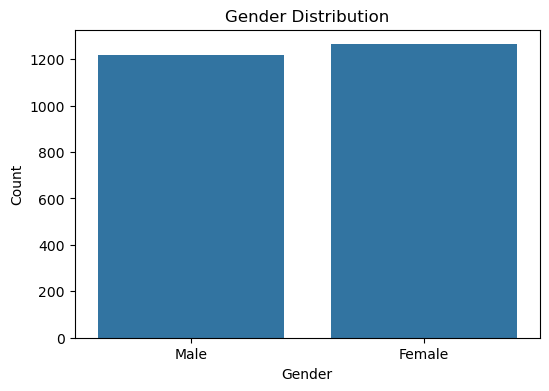

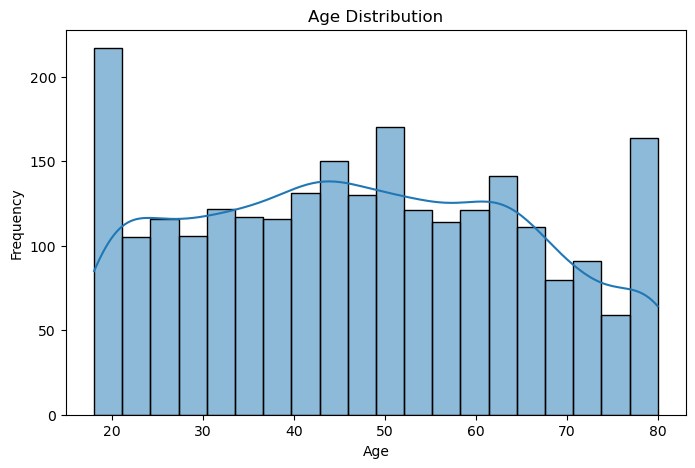

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution (count plot)
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=cvd)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age distribution (histogram)
plt.figure(figsize=(8,5))
sns.histplot(cvd['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# 2. Obesity and BMI

## Question: What’s the prevalence of high BMI or obesity by gender and age group?

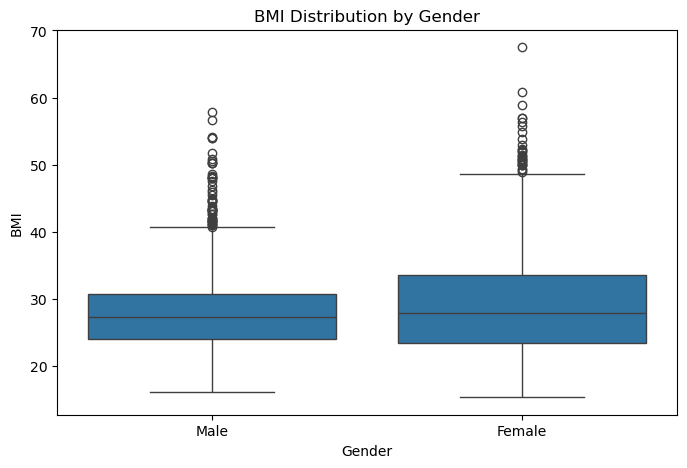

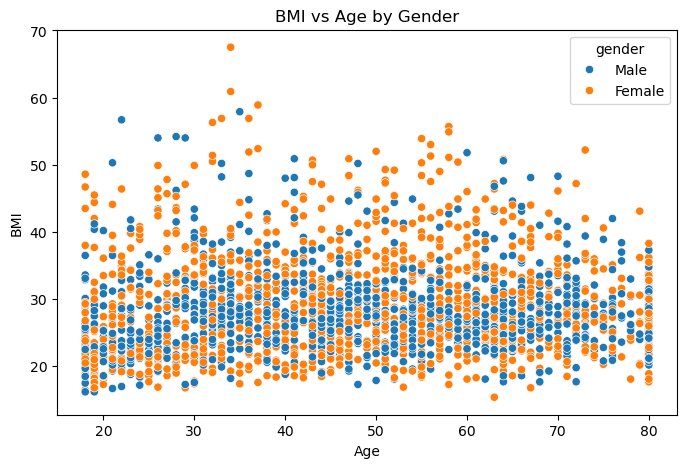

In [198]:
# Boxplot of BMI by gender
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='bmi', data=cvd)
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

# Scatterplot BMI vs Age, colored by gender
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='bmi', hue='gender', data=cvd)
plt.title('BMI vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


# 3. Blood Pressure Analysis

## Question: What are the average systolic and diastolic BP levels? Are there differences by gender or age group?

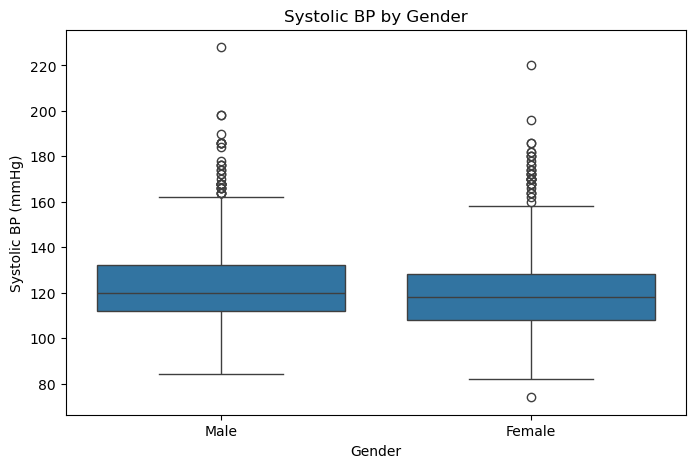

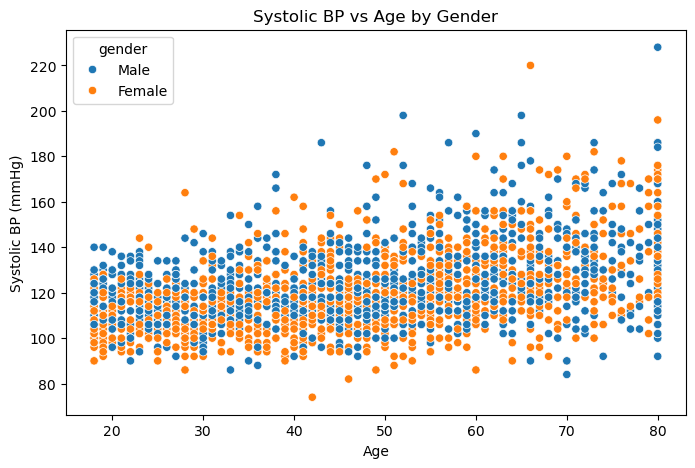

In [206]:
# Boxplot of systolic BP by gender
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='systolic_bp_1', data=cvd)
plt.title('Systolic BP by Gender')
plt.xlabel('Gender')
plt.ylabel('Systolic BP (mmHg)')
plt.show()

# Scatterplot systolic BP vs Age
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='systolic_bp_1', hue='gender', data=cvd)
plt.title('Systolic BP vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Systolic BP (mmHg)')
plt.show()

# 4. Cholesterol and Lipids

## Question: What’s the distribution of LDL, HDL, and triglycerides in the population?

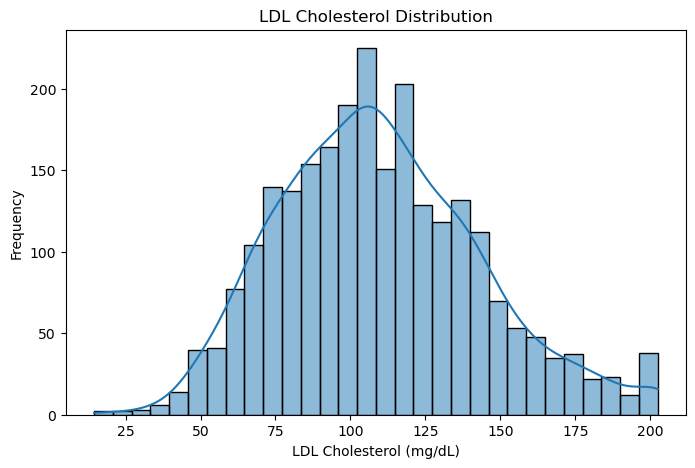

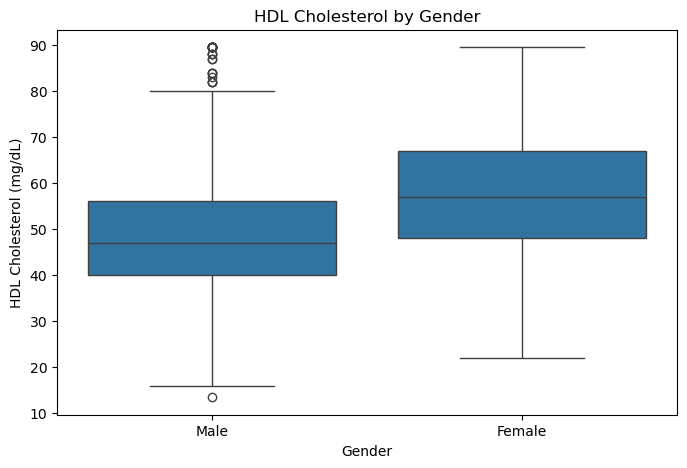

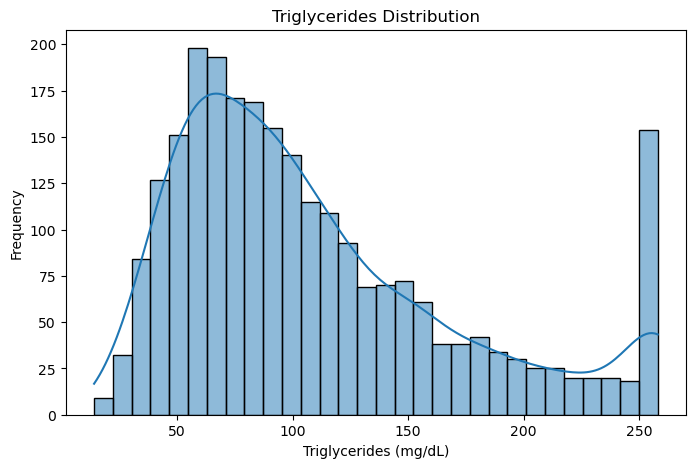

In [218]:
# LDL Distribution
plt.figure(figsize=(8,5))
sns.histplot(cvd['ldl_cholesterol_mg_dl'], bins=30, kde=True)
plt.title('LDL Cholesterol Distribution')
plt.xlabel('LDL Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

# HDL Distribution by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='hdl_cholesterol_mg_dl', data=cvd)
plt.title('HDL Cholesterol by Gender')
plt.xlabel('Gender')
plt.ylabel('HDL Cholesterol (mg/dL)')
plt.show()

# Triglycerides Distribution
plt.figure(figsize=(8,5))
sns.histplot(cvd['triglycerides_mg_dl'], bins=30, kde=True)
plt.title('Triglycerides Distribution')
plt.xlabel('Triglycerides (mg/dL)')
plt.ylabel('Frequency')
plt.show()


# 5. Cardiovascular Risk Profile

## Question: Can we identify groups at higher risk for CVD?

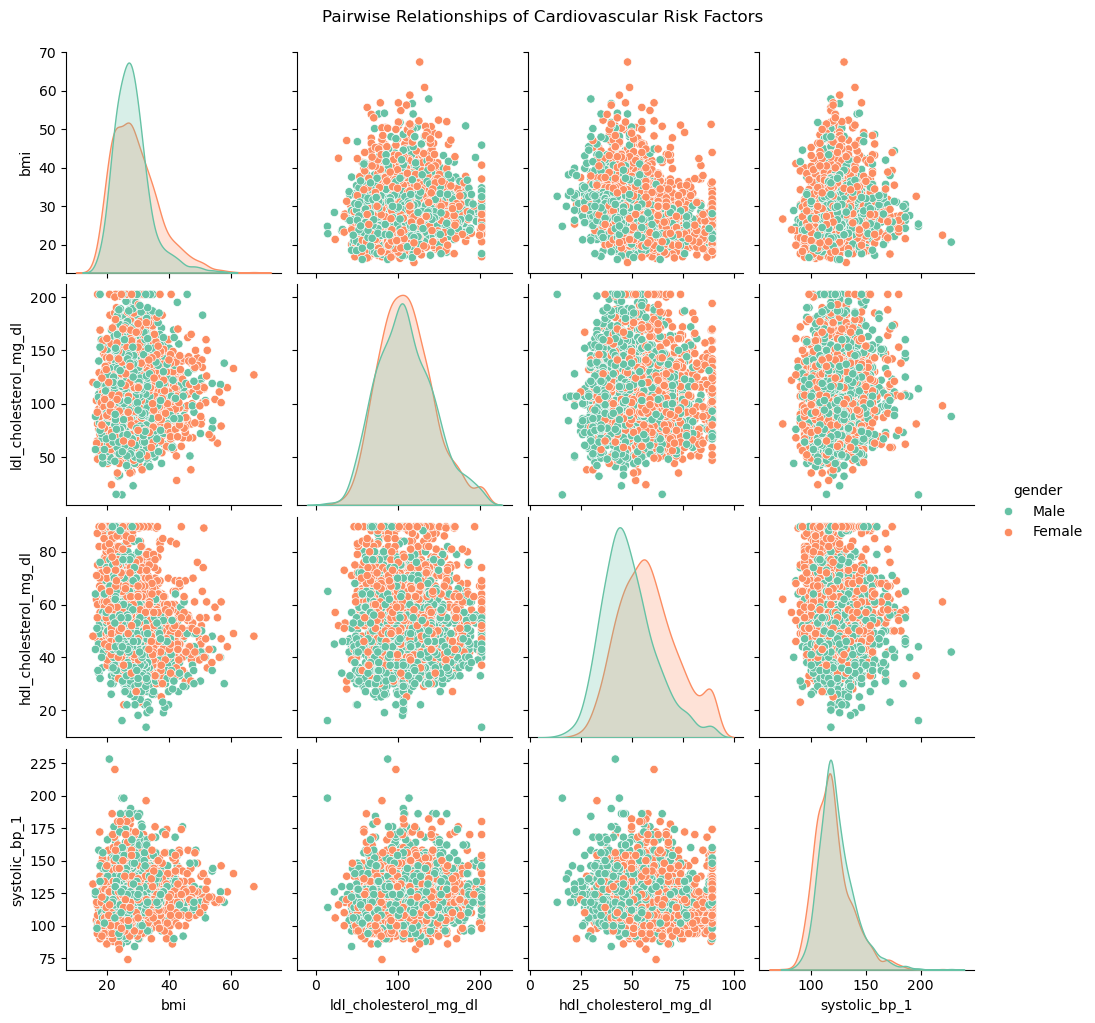

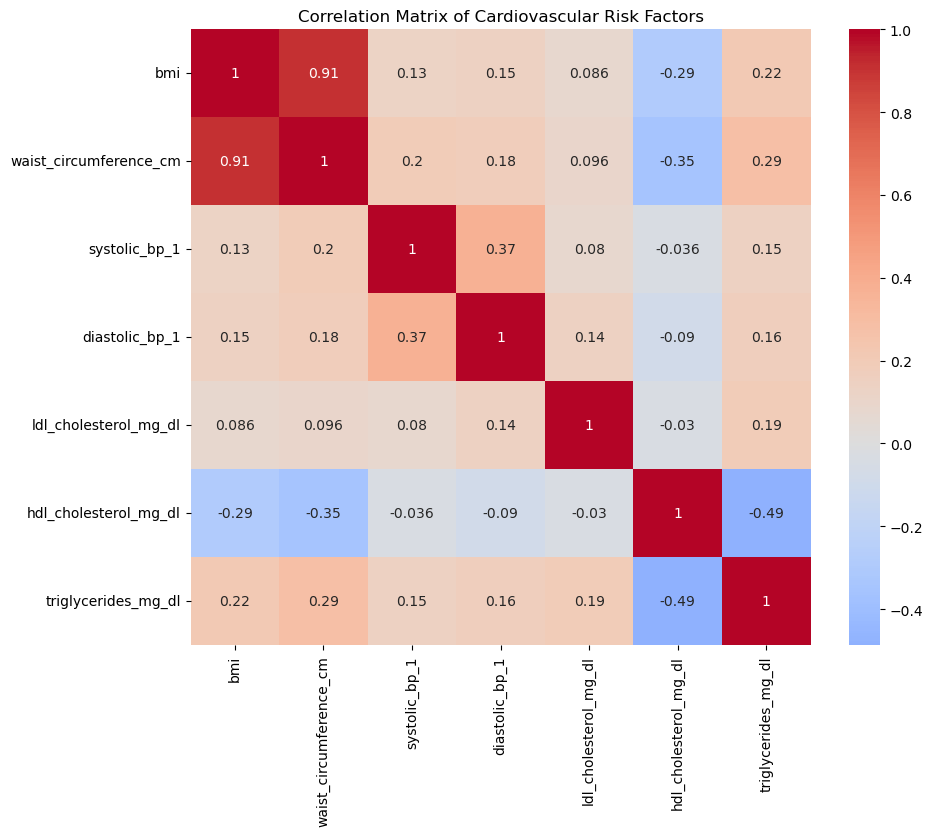

In [224]:
# Pairplot of BMI, LDL, HDL, BP colored by gender
sns.pairplot(cvd, vars=['bmi', 'ldl_cholesterol_mg_dl', 'hdl_cholesterol_mg_dl', 'systolic_bp_1'], hue='gender', diag_kind='kde', palette='Set2')
plt.suptitle('Pairwise Relationships of Cardiovascular Risk Factors', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
corr_cols = ['bmi', 'waist_circumference_cm', 'systolic_bp_1', 'diastolic_bp_1', 'ldl_cholesterol_mg_dl', 'hdl_cholesterol_mg_dl', 'triglycerides_mg_dl']
sns.heatmap(cvd[corr_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cardiovascular Risk Factors')
plt.show()


# 7. Combined Risk Factors


## Question: How many people have multiple risk factors by gender or age?

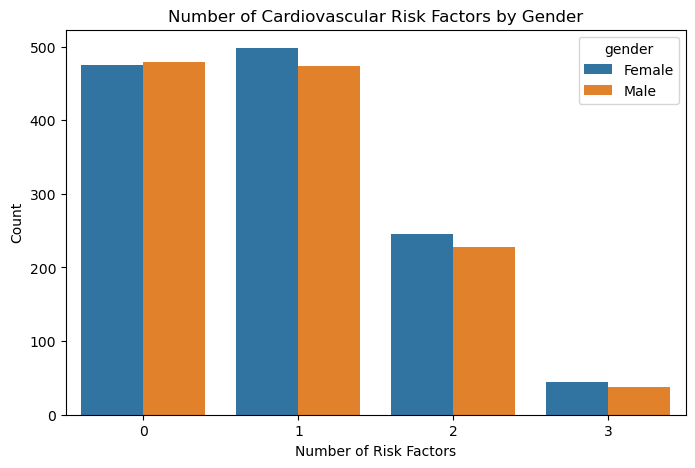

In [230]:
# Create new risk factors
cvd['high_bmi'] = cvd['bmi'] >= 30
cvd['high_ldl'] = cvd['ldl_cholesterol_mg_dl'] >= 130
cvd['high_bp'] = cvd['systolic_bp_1'] >= 130

# Sum risk factors
cvd['risk_score'] = cvd[['high_bmi', 'high_ldl', 'high_bp']].sum(axis=1)

# Bar plot of risk scores by gender
plt.figure(figsize=(8,5))
sns.countplot(x='risk_score', hue='gender', data=cvd)
plt.title('Number of Cardiovascular Risk Factors by Gender')
plt.xlabel('Number of Risk Factors')
plt.ylabel('Count')
plt.show()


In [ ]:
jovian.commit(filename="240198543_DataVisualisation.ipynb")

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY: